In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from utils import look_back_dataset, \
                  load_data, \
                  normalize, \
                  split, \
                  reshape, \
                  transform, \
                  transform_predict, \
                  rmse, \
                  plot \

In [71]:
# set the lookback (int)

look_back = 10

In [72]:
# load the dataset

dataset = load_data()

In [73]:
# normalize data

dataset = normalize(dataset)

In [74]:
# split to train/test data

train, test = split(dataset)

In [75]:
# reshape looking back for ...

train_X, train_Y = look_back_dataset(train, look_back)
test_X, test_Y = look_back_dataset(test, look_back)

In [76]:
#reshape to fit RNN's input shape

train_X, test_X = reshape(train_X,test_X)

In [77]:
# build, compile and train RNN

model = Sequential()

model.add(LSTM(
  units=4, 
  input_shape=(1,look_back) 
  ))

model.add(Dense(
  units=1
  ))

In [78]:
# compile

model.compile(
  loss='mean_squared_error', 
  optimizer="nadam"
  )

In [79]:
# train

model.fit(
  train_X, train_Y, 
  epochs=100, 
  batch_size=1, 
  verbose=0
  )

In [80]:
# make predictions

train_Pred = model.predict(train_X)
test_Pred = model.predict(test_X)

In [81]:
# transform

train_Pred = transform_predict(train_Pred)
test_Pred = transform_predict(test_Pred)
train_Y = transform(train_Y)
test_Y = transform(test_Y)

In [82]:
# calculate root mean square error for train and test data
# real Y vs. predicted Y

train_score = rmse(train_Y, train_predict)
test_score = rmse(test_Y, test_predict)

print('Train Score: %.2f RMSE' % (train_score))
print('Test Score: %.2f RMSE' % (test_score))

Train Score: 19.09 RMSE
Test Score: 48.95 RMSE


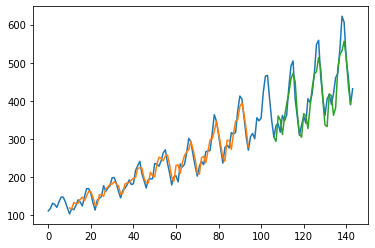

In [83]:
# plot data on a graph
plot(dataset,train_Pred,test_Pred,look_back)

In [84]:
# give the mode's summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 4)                 240       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________
